This is a notebook that implements some ML algorithms such as K-Means, PCA, Islated forest, Gradient boosting **FROM SCRATCH!!**

**k means**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Params
N = 30000
num_clusters = 3
num_iter = 100
min_err = 1e-8
colors= ['r', 'g', 'b']


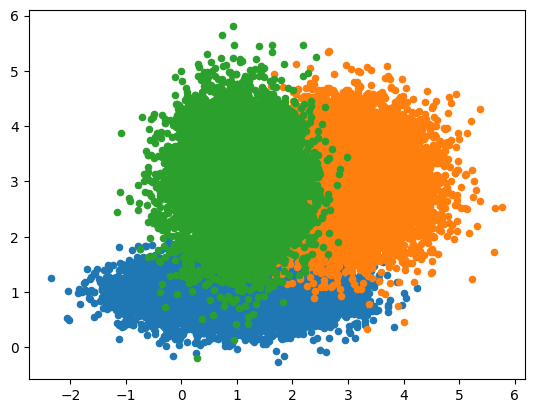

In [4]:
# Generate Data
x1 = np.random.multivariate_normal(mean=[1, 1], cov=[[.8, 0], [0, .1]], size=(N//num_clusters))
x2 = np.random.multivariate_normal(mean=[3, 3], cov=[[.5, 0], [0, .4]], size=(N//num_clusters))
x3 = np.random.multivariate_normal(mean=[1, 3], cov=[[.3, 0], [0, .5]], size=(N//num_clusters))
X = [x1, x2, x3]

plt.scatter(x1[:, 0], x1[:, 1], s=20)
plt.scatter(x2[:, 0], x2[:, 1], s=20)
plt.scatter(x3[:, 0], x3[:, 1], s=20)

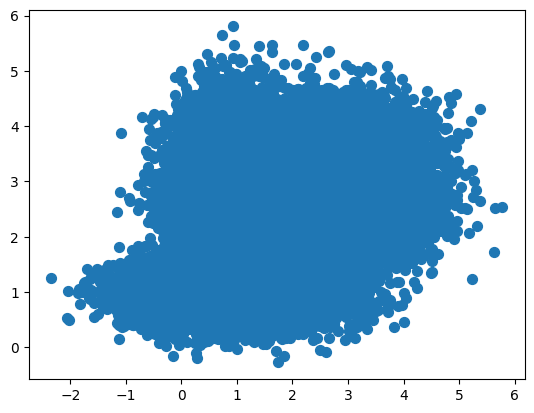

In [5]:
# Create a dataset
X_np = np.array(X)
X_np = X_np.reshape(N, -1)
plt.scatter(X_np[:, 0], X_np[:, 1], s=50)


In [6]:
# This function calculate the distance between all the points (X) and the center (center)
def cal_dist(center, X):
  dist_mat = np.zeros((N, num_clusters))
  for i in range(num_clusters):
    for j in range(N):
      dist_mat[j, i] = np.linalg.norm(center[i] - X[j , :])
  return dist_mat

centeriods = X_np[np.random.randint(N, size=(3,)), :]
distmat = cal_dist(centeriods, X_np)

assigned_clusters = np.argmin(distmat, axis=1)
centeriods.shape


(3, 2)

0
[[3.53178373 3.31032284]
 [2.29403836 2.41712274]
 [0.70602524 1.9993368 ]]
1
[[3.37473344 3.2512107 ]
 [2.13342776 2.531214  ]
 [0.72291021 1.86421892]]
2
[[3.34157924 3.18352161]
 [1.88730991 2.76003499]
 [0.72660463 1.65431991]]
3
[[3.32786432 3.06847108]
 [1.52498049 3.0430877 ]
 [0.81748841 1.31815725]]
4
[[3.25039158 2.97188592]
 [1.2304642  3.15945573]
 [0.93200034 1.12382366]]
5
[[3.17389525 2.96025102]
 [1.11415878 3.16073325]
 [0.95700385 1.08309346]]
6
[[3.13608566 2.96377088]
 [1.0687181  3.15408   ]
 [0.9616061  1.07232412]]
7
[[3.12166673 2.96606191]
 [1.05246476 3.15130084]
 [0.96309657 1.06906412]]
8
[[3.11394104 2.96785268]
 [1.04406342 3.14949603]
 [0.96361817 1.0676671 ]]
9
[[3.11041918 2.96871506]
 [1.04025699 3.14847197]
 [0.96389797 1.06683943]]
10
[[3.10923395 2.96878437]
 [1.03902186 3.14826209]
 [0.96390663 1.06657471]]
11
[[3.10869721 2.96890419]
 [1.03857764 3.14812044]
 [0.9638078  1.06648827]]
12
[[3.1084769  2.96891704]
 [1.03836388 3.14814502]
 [0.96380

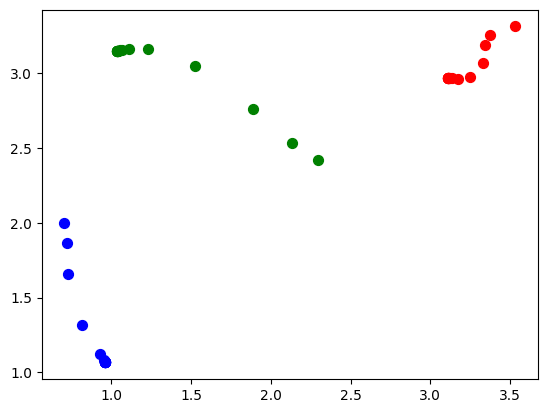

In [7]:
# Main loop
flag = 1
iter = 0
plt.figure()
# random centriods
centeriods = X_np[np.random.randint(N, size=(3,)), :]  # (3, 2)
while flag:
  print(iter)
  distmat = cal_dist(centeriods, X_np)
  # assigne clusters to points
  assigned_clusters = np.argmin(distmat, axis=1)
  new_centriod = centeriods.copy()
  # update centriods
  for ci in range(num_clusters):
    tmp_indx = np.where(assigned_clusters == ci)[0]
    new_centriod[ci, :] = np.mean(X_np[tmp_indx, :], axis=0)

  err = np.abs(new_centriod.mean() - centeriods.mean())
  centeriods = new_centriod
  print(centeriods)

  for ci in range(num_clusters):  # This plot shows how centriods have evloved through iterations
    plt.scatter(centeriods[ci, 0], centeriods[ci, 1], c=colors[ci], s=50)

  # check if finish
  if iter > num_iter:
    print('iter_reached')
    flag = 0

  if err <= min_err:
    print('error_reached')
    flag = 0

  iter += 1

  if flag == 0:
    break


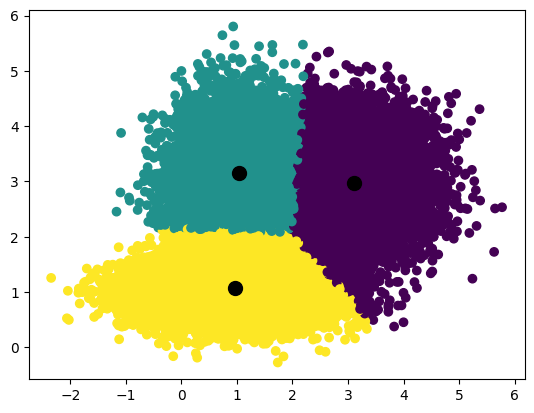

In [8]:
# Visualisation of the results
assigned_clusters = assigned_clusters.astype(int)
plt.scatter(X_np[:, 0], X_np[:, 1], c=assigned_clusters)
plt.scatter(centeriods[:, 0], centeriods[:, 1], s=100, c='k') # Balck dotes are Centriods

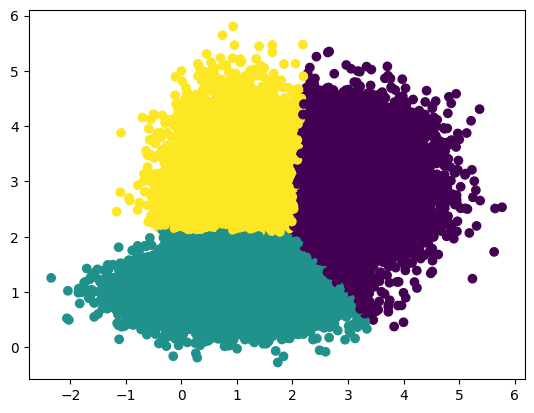

In [9]:
# Compare our implenation of k-means with sklearn KMeans package
from sklearn.cluster import KMeans as kmeans
kmeans = kmeans(n_clusters=num_clusters)
assigned_clusters = kmeans.fit_predict(X_np)
assigned_clusters

plt.scatter(X_np[:, 0], X_np[:, 1], c=assigned_clusters)

**Non-Linear Classification** (Gradient Descent),
well, this is not from scratch, we are using pytroch for this :D
Yet, still important to play with non-linearity here!

In [10]:
#

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

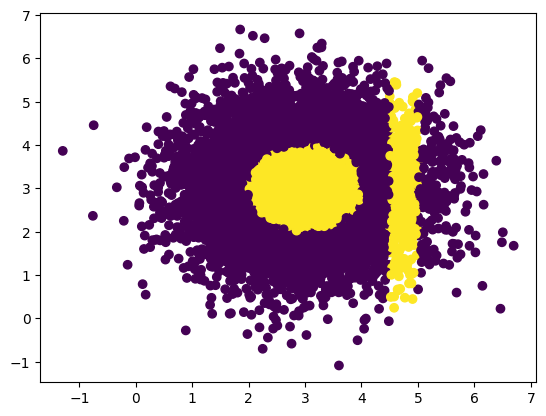

In [11]:
# Genrate Data with weid calsses that could not be linearly classifed
N = 10000
X = np.random.multivariate_normal(mean=[3, 3], cov=[[1, 0], [0, 1]], size=(N,))
label = np.zeros(X.shape[0])
# label = np.double((X[:, 0]>3) & (X[:,1]>3))
label[np.sqrt(((X[:, 0] - 3)**2 + (X[:, 1] - 3)**2)) < 1] = 1
label[((X[:, 0] > 4.5) & (X[:, 0] < 5))] = 1

plt.scatter(X[:, 0], X[:, 1], c=label)


In [12]:
# define a Network via Pytorch

class my_linear_net(nn.Module):
  def __init__(self, input_n, hidden_n) -> None:
    super(my_linear_net, self).__init__()

    self.fc1 = nn.Linear(in_features=input_n, out_features=hidden_n)
    self.fc2 = nn.Linear(in_features=hidden_n, out_features=hidden_n)
    self.fc3 = nn.Linear(in_features=hidden_n, out_features=1)

    self.sig = nn.Sigmoid()
    self.relu = nn.ReLU()


  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)

    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)

    x = self.fc3(x)


    return self.sig(x)



In [13]:
# Initiate the model, optimizer and define loss functions and other params
model = my_linear_net(input_n= X.shape[1], hidden_n=50)
ciriteria = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_iter = 100
batch= 32

In [32]:
# Tensorize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


tensor([[3.2082e-13],
        [1.0000e+00],
        [1.4457e-05],
        [1.0000e+00],
        [8.5448e-02],
        [1.0000e+00],
        [3.4813e-25],
        [1.7245e-06],
        [2.9292e-02],
        [1.0000e+00],
        [9.9991e-01],
        [9.9967e-01],
        [5.8394e-01],
        [1.0000e+00],
        [6.6447e-08],
        [1.0000e+00],
        [9.9999e-01],
        [6.0121e-01],
        [4.4310e-04],
        [1.0000e+00],
        [1.8367e-15],
        [7.7716e-03],
        [1.0000e+00],
        [1.9887e-02],
        [9.9405e-01],
        [1.0000e+00],
        [1.5595e-01],
        [5.1914e-03],
        [3.0950e-01],
        [1.0005e-04],
        [5.4823e-02],
        [4.7389e-02]], grad_fn=<SigmoidBackward0>)


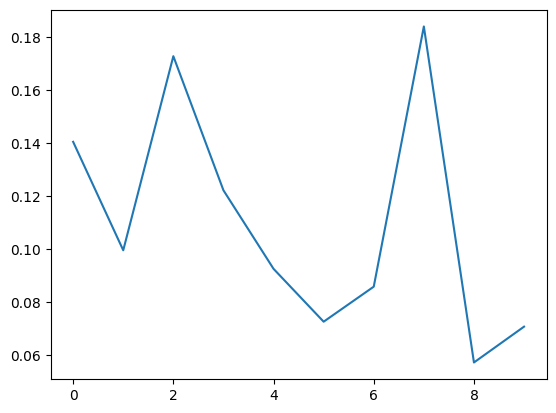

In [33]:
# Main loop for training
n_iter=10
train_loss = []
for i in range(n_iter):
  model.train()
  for batch_x, batch_y in train_loader:
    optimizer.zero_grad()
    predict = model(batch_x)
    loss = ciriteria(predict.squeeze(), batch_y)
    loss.backward()
    optimizer.step()
  train_loss.append(loss.item())


plt.plot(train_loss)
print(predict)


In [38]:
# Evlautation phase
test_loade9r = DataLoader(test_dataset, batch_size=2000, shuffle=False)
x_test, y_test = next(iter(test_loader))

model.eval() # This is very important, it tell the pytoch that we are evaluating the model
# it is important when you use dropout or batchnorm etc in the traning
with torch.no_grad(): # we want to make sure, no gradient is being computed during our inference
  pred_labels = torch.zeros(x_test.shape[0])
  pred_labels[torch.where(model(x_test) > 0.5)[0]] = 1
  accuracy = torch.where((pred_labels - y_test) == 0)[0].shape[0]/x_test.shape[0]
  print(f'Model accuracy: {accuracy:.2f}')

plt.scatter(x_test[:, 0], x_test[:, 1], s=50, c=pred_labels)


TypeError: 'int' object is not callable

implementing **PCA**

In [39]:
# Generate Data
n_comp = 2
N = 100
X1 = np.random.multivariate_normal([0, 1, 3], cov=[[1, 0, 0], [0, 1, 0], [0, 0, 1]], size=(N//2,))
X2 = np.random.multivariate_normal([0, 5, 6], cov=[[1, 0, 0], [0, 1, 0], [0, 0, 1]], size=(N//2,))
X = np.concatenate((X1, X2), axis=0)
X.shape


(100, 3)

In [40]:
np.array([[1, 0, 0], [0, 0, 1]]).shape

(2, 3)

In [41]:
# Center the data
X_centered = X - np.mean(X, axis=0)


In [42]:
# Calculate CovMat
covMat = np.cov(X_centered.T)

In [43]:
# Get the egien vals
vals, vectors = np.linalg.eig(covMat)
sorted_indx = np.flip(np.argsort(vals))
sorted_vectors = vectors[:, sorted_indx]

# norm_factors = np.linalg.norm(sorted_vectors, axis=0)
# normalized_vectors = sorted_vectors / norm_factors

comp_vecotrs = sorted_vectors[:, :n_comp]



In [44]:
# Get the components
components = np.zeros((N, n_comp))
for ci in range(n_comp):
  components[:, ci] = np.dot(X_centered, comp_vecotrs[:, ci])


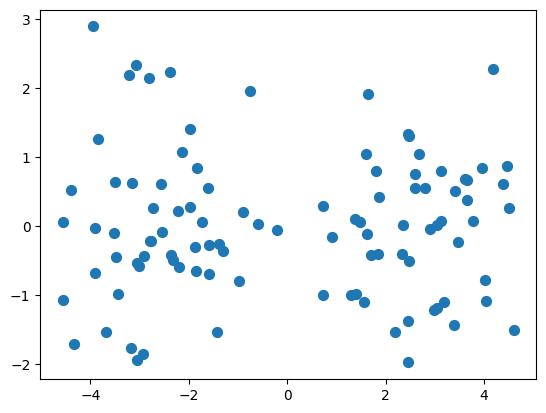

In [45]:
# Plotting
plt.scatter(components[:, 0], components[:, 1], s=50)


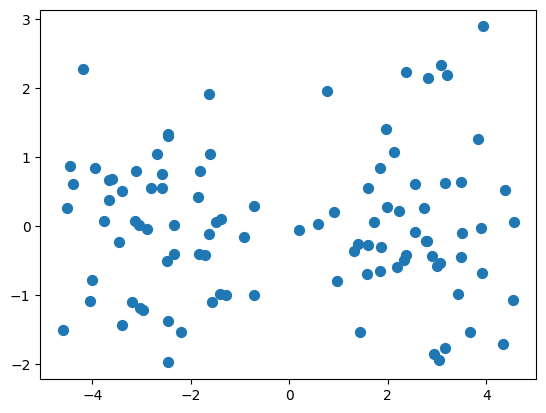

In [46]:
# Compare with sklearn PCA
from sklearn.decomposition import PCA
pca_trasfom = PCA(n_components=n_comp).fit_transform(X)
plt.scatter(pca_trasfom[:, 0], pca_trasfom[:, 1], s=50)

**Gradinet Boosting**


(100, 2)
(100, 1)
(100, 3)


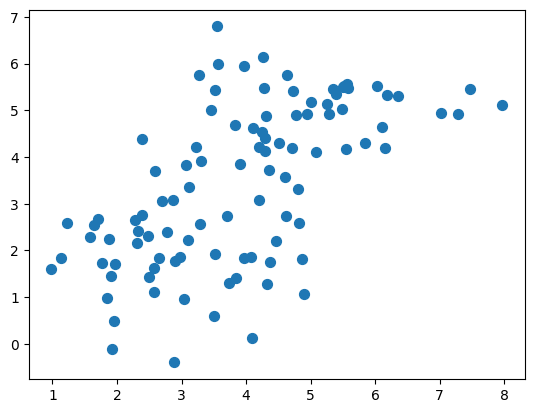

In [48]:
#  Generate Data
N = 100
X1 = np.random.multivariate_normal(mean=[3, 2], cov=[[1.7, 0], [0, .8]], size=(N//2,))
X2 = np.random.multivariate_normal(mean=[5, 5], cov=[[1.5, 0], [0, .8]], size=(N//2,))
tr_X = np.vstack((X1, X2))
tmp_label = np.zeros((N, 1))
tmp_label[:N//2] = 1
tmp_label.shape
X = np.concatenate((tr_X, tmp_label), axis=1)
print(tr_X.shape)
print(tmp_label.shape)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [50]:
from sklearn.linear_model import LinearRegression as linear
target = X[:, 2]
data = X[:, :2]

old_predicted = np.mean(target)* np.ones(N)  # the forst prediciton is simple the "mean" model

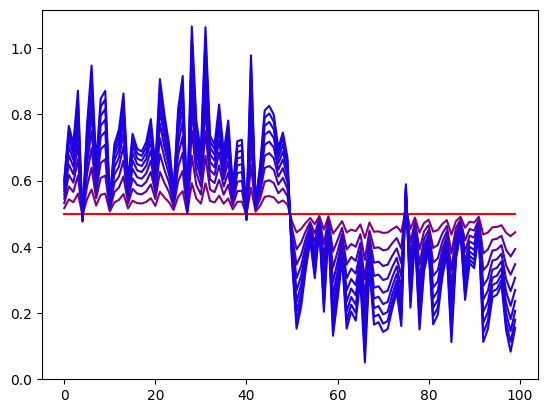

In [51]:
# in each iteration, we fit the model to the residuals of the prevoius model
Num_Iter = 10
lr = .1
all_res = []
for i in range(Num_Iter):
  plt.plot(old_predicted, c=[1/(i+1), 0, 1-1/(i+1)])
  res = target - old_predicted
  res_model = linear().fit(data, res)
  new_prediction = res_model.predict(data)
  old_predicted = old_predicted + lr * new_prediction
  all_res.append(np.mean(res))



**Isolation Trees**

(100, 2)


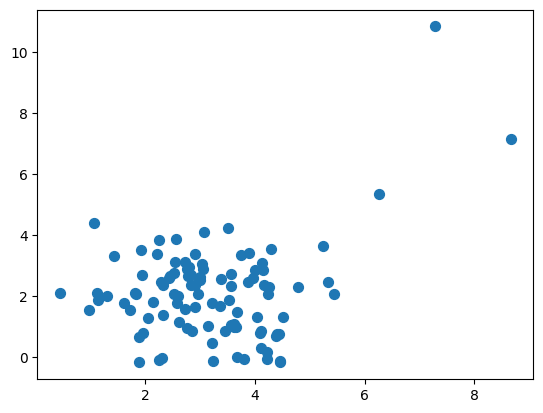

In [52]:
# Generate_Data
N = 100
X = np.random.multivariate_normal(mean=[3, 2], cov=[[1, 0], [0, 1]], size=(N,))
anomly_indx = [3, 6, 9]
X[anomly_indx] += 5. # Generate some outliers

# X[5] += 5

plt.scatter(X[:, 0], X[:, 1], s=50)
print(X.shape)

In [53]:
# Make a random tree
def make_tree(br_data, current_depth, max_depth):
  if current_depth >= max_depth  or br_data.shape[0] < 2:
    return {
        'depth': current_depth,
        'size': len(br_data),
    }
  split = np.random.uniform(low=br_data.min(), high=br_data.max())
  left_data = br_data[br_data < split]
  right_data = br_data[br_data >= split]

  node = {
      'split': split,
      'left': make_tree(left_data, current_depth + 1, max_depth),
      'right': make_tree(right_data, current_depth + 1, max_depth),
      'depth': current_depth
  }

  # print(node)
  return node




node = make_tree(X[:, 1], 0, 1)
node



{'split': 7.458431732957184,
 'left': {'depth': 1, 'size': 99},
 'right': {'depth': 1, 'size': 1},
 'depth': 0}

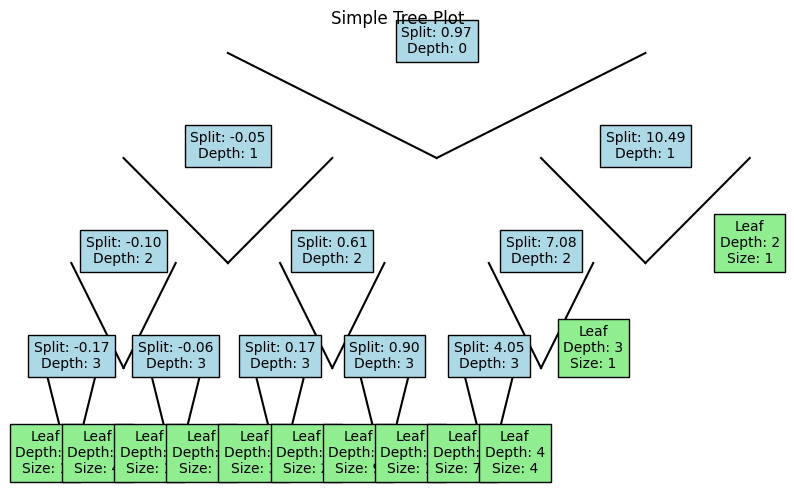

In [54]:
# See the tree
def plot_tree_simple(ax, tree, x=0.5, y=1, dx=0.25, dy=0.1, depth=0):
    """Recursively plot the tree on the given axes."""
    if 'split' in tree:
        # Plot the current split node
        ax.text(x, y, f"Split: {tree['split']:.2f}\nDepth: {tree['depth']}", ha='center', bbox=dict(facecolor='lightblue', edgecolor='black'))

        # Plot the left branch
        if 'left' in tree:
            ax.plot([x, x - dx], [y - dy, y], 'k-')
            plot_tree_simple(ax, tree['left'], x - dx, y - dy, dx / 2, dy, depth + 1)

        # Plot the right branch
        if 'right' in tree:
            ax.plot([x, x + dx], [y - dy, y], 'k-')
            plot_tree_simple(ax, tree['right'], x + dx, y - dy, dx / 2, dy, depth + 1)
    else:
        # Plot leaf node
        ax.text(x, y, f"Leaf\nDepth: {tree['depth']}\nSize: {tree['size']}", ha='center', bbox=dict(facecolor='lightgreen', edgecolor='black'))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Simple Tree Plot")
ax.set_axis_off()  # Turn off the axis
plot_tree_simple(ax, make_tree(X[:, 1], 0, 4))


In [56]:
# Get depth of a tree for a given data (x)
def get_depth(tree, x):
  depth = 0
  while True:
    if 'split' not in tree:
      # print('finish')
      return depth
    # print('not finished')
    split = tree['split']
    if x > split:
      tree = tree['right']
    else:
      tree = tree['left']
    depth += 1

tree = make_tree(X[:, 1], 0, 2)
print(get_depth(tree, 2))



2


In [57]:
# Create Forest
def create_forest(num=100, data=X, test_data=X):
  num_features = X.shape[1]
  iter = 0
  depth_mat = np.zeros((num, test_data.shape[0]))

  while iter < num:
    chosen_fearture = np.random.choice(num_features)
    tmpdata = X[:, chosen_fearture]
    tree = make_tree(tmpdata, 0, max_depth=10)

    for i in range(len(test_data)):
      depth_mat[iter, i] = get_depth(tree, test_data[i, chosen_fearture])

    iter += 1

  return depth_mat

depth_mat = create_forest(5, X, X)







Text(0.5, 1.0, 'Distribuaiton of the depths')

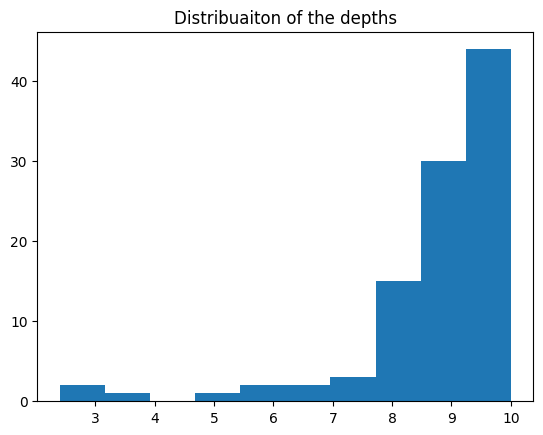

In [59]:
plt.hist(depth_mat.mean(0))
plt.title('Distribuaiton of the depths')

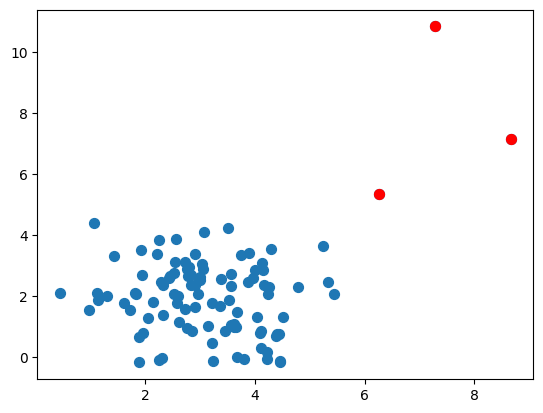

In [61]:
plt.scatter(X[:, 0], X[:, 1], s=50)
mean_lenght = depth_mat.mean(0)
outliers = np.where(mean_lenght < 5)[0] # Setting a threshold to detemrine if a data point is outlier
plt.scatter(X[outliers, 0], X[outliers, 1], s=50, c='r')